# Development project in Machine Learning

### Students name : 
- MOALIC Tom
- GRANDJACQUOT Alexis
- GARFAGNI Maxime
- LE ROY Thibault 

In [1]:
#pip install scikit-learn==1.2.2

In [2]:
import main
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
import unittest

# Avoid warnings
import warnings
warnings.filterwarnings("ignore")

## I - Data Cleaning

In [3]:
# Load the data
df_kidney, df_bank = main.getData()
# Clean the data
df_kidney, df_bank = main.clean_data(df_kidney , df_bank)


# Separation of data into train and validation sets
df_kidney_Train,df_kidney_Test,df_bank_Train,df_bank_Test=main.prepare_data(df_kidney,df_bank)

# We check that no Null values are left in the dataset and that the types of the data are as expected
print("Null value in df_ban : \n",df_bank.isna().sum())
print("Types in df_bank : \n",df_bank.dtypes)

print()
print("Null value in df_kidney : \n",df_kidney.isna().sum())
print("Types in df_kideney : \n",df_kidney.dtypes)

df_bank.head()

Null value in df_ban : 
 variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64
Types in df_bank : 
 variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

Null value in df_kidney : 
 age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64
Types in df_kideney : 
 age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc         bool
pc          bool
pcc         bool
ba          bool
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wc       float64
rc       float64
htn         bool
dm          bool
cad         bool
appet       bool
pe          bool
ane         bool
class   

variance  skewness  curtosis   entropy  class
0  0.769004  0.839643  0.106783  0.736628      0
1  0.835659  0.820982  0.121804  0.644326      0
2  0.786629  0.416648  0.310608  0.786951      0
3  0.757105  0.871699  0.054921  0.450440      0
4  0.531578  0.348662  0.424662  0.687362      0

As expected, there is no missing value left in the dataset, the type of the data can be used for classification and the data is normalized (all the values are in [0,1]).

So now, the data is ready to be used for binary classification, but let's first have a look at how each variable influences the resulting class. Let's consider the example of the bank dataset with variables "variance", "skewness", "curtosis" and "entropy".

<Axes: >

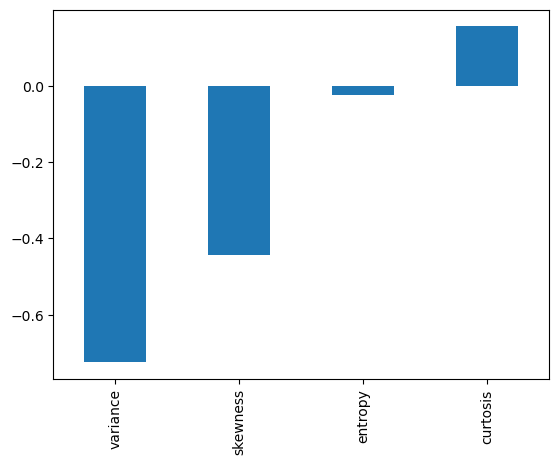

In [4]:
#plot correlation between each variable and the resulting class

df_bank.corr()["class"].sort_values().drop("class").plot(kind = 'bar')

<Figure size 800x600 with 0 Axes>

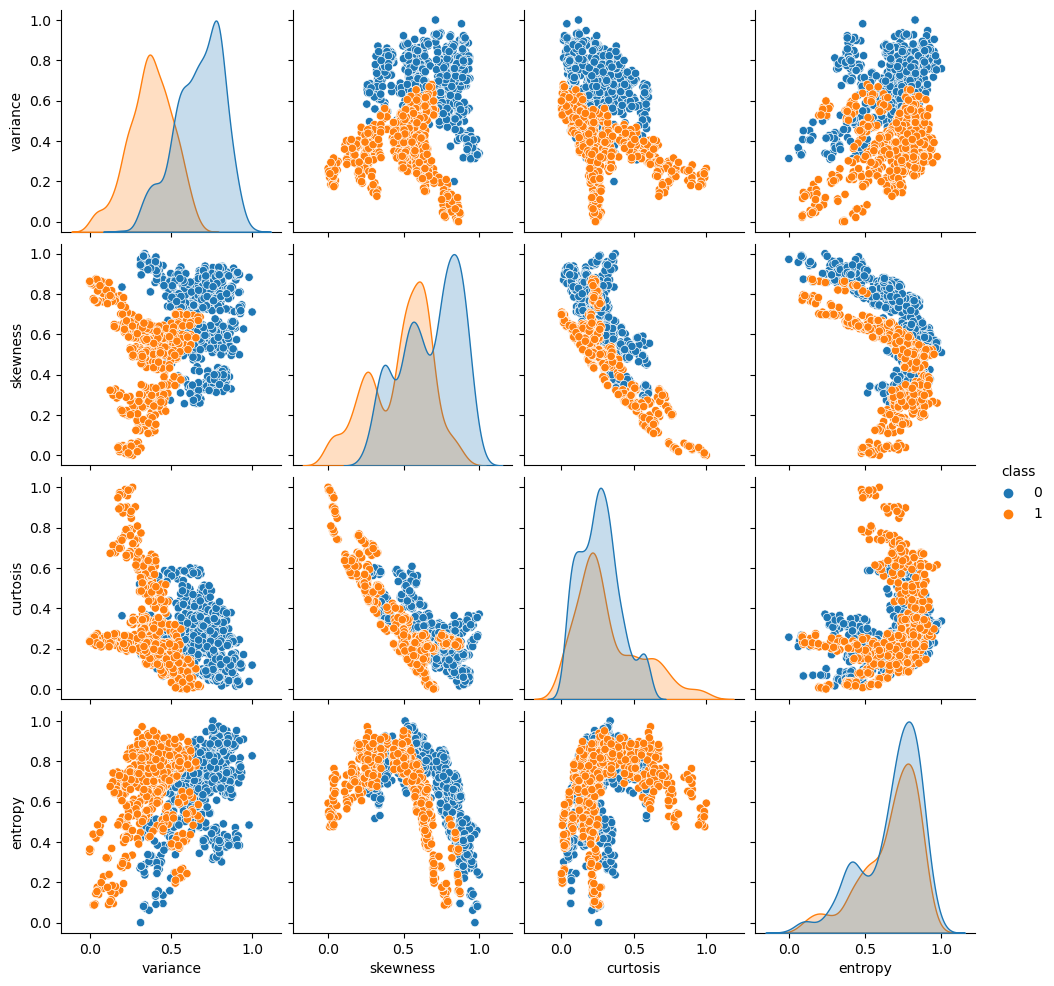

In [5]:
plt.figure(figsize=(8, 6))
sns.pairplot(df_bank, hue = "class")

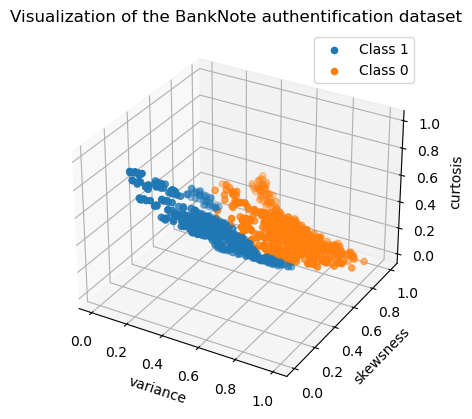

In [6]:
#3d plot of data according to the 3 most impactful variables

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(df_bank[df_bank['class'] == 1]['variance'], df_bank[df_bank['class'] == 1]['skewness'], df_bank[df_bank['class'] == 1]["curtosis"], label = "Class 1")
ax.scatter(df_bank[df_bank['class'] == 0]['variance'], df_bank[df_bank['class'] == 0]['skewness'], df_bank[df_bank['class'] == 0]["curtosis"], label = "Class 0")
plt.title("Visualization of the BankNote authentification dataset")
ax.set_xlabel("variance")
ax.set_ylabel("skewsness")
ax.set_zlabel("curtosis")
plt.legend()
plt.show()

Before training and comparing the different methods we chose, let's use an unit test to test one of these machine learning methods, the Logistic regression one.

We execute a script of an unit_test, which simulates a dataset with classes, and apply to it the function/method of logistic regression.

In [7]:
%run unit_test.py

Fitting 5 folds for each of 12 candidates, totalling 60 fits


.

Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validated score: 0.975
Test set score using the best model: 0.975



----------------------------------------------------------------------
Ran 1 test in 8.131s

OK


## II - Binary classification

In [8]:
#pip install --user numpy scikit-learn threadpoolctl

In [10]:
Methods = ["KNN","Random_forest","Decision_tree", "MLP", "Logistic regression"]
Datasets = {"Bank dataset" : [df_bank_Train, df_bank_Test], "Kidney dataset" : [df_kidney_Train, df_kidney_Test]}

Classifiers, Classifiers_average_score = main.Train(Methods, Datasets)


['KNN', 'Decision_tree', 'MLP', 'Logistic regression']

 
-----------------------------------Training on the Bank dataset-----------------------------------

-----------------------------------Training using a KNN algorithm-----------------------------------
Score for KNN of with n_neighbors = 1 = 1.0
Score for KNN of with n_neighbors = 2 = 1.0
Score for KNN of with n_neighbors = 3 = 1.0
Score for KNN of with n_neighbors = 4 = 1.0
Score for KNN of with n_neighbors = 5 = 1.0
Score for KNN of with n_neighbors = 6 = 1.0
Score for KNN of with n_neighbors = 7 = 0.9941690962099126
Score for KNN of with n_neighbors = 8 = 0.9970845481049563
Score for KNN of with n_neighbors = 9 = 0.9941690962099126
Score for KNN of with n_neighbors = 10 = 0.9941690962099126
Score for KNN of with n_neighbors = 11 = 0.9854227405247813
Score for KNN of with n_neighbors = 12 = 0.9941690962099126
Score for KNN of with n_neighbors = 13 = 0.9912536443148688
Score for KNN of with n_neighbors = 14 = 0.9941690962099126


Score for tree classifier of depth 27 = 0.9825072886297376
Score for tree classifier of depth 28 = 0.9795918367346939
Score for tree classifier of depth 29 = 0.9795918367346939
Score for tree classifier of depth 1 = 0.8571428571428571
Score for tree classifier of depth 2 = 0.9067055393586005
Score for tree classifier of depth 3 = 0.9271137026239067
Score for tree classifier of depth 4 = 0.9446064139941691
Score for tree classifier of depth 5 = 0.9446064139941691
Score for tree classifier of depth 6 = 0.9650145772594753
Score for tree classifier of depth 7 = 0.9446064139941691
Score for tree classifier of depth 8 = 0.956268221574344
Score for tree classifier of depth 9 = 0.9416909620991254
Score for tree classifier of depth 10 = 0.9329446064139941
Score for tree classifier of depth 11 = 0.9416909620991254
Score for tree classifier of depth 12 = 0.9358600583090378
Score for tree classifier of depth 13 = 0.9358600583090378
Score for tree classifier of depth 14 = 0.9446064139941691
Score f

Best parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validated score: 0.9961538461538462
Test set score using the best model: 0.9912536443148688

 
-----------------------------------Training on the Kidney dataset-----------------------------------

-----------------------------------Training using a KNN algorithm-----------------------------------
Score for KNN of with n_neighbors = 1 = 0.98
Score for KNN of with n_neighbors = 2 = 0.93
Score for KNN of with n_neighbors = 3 = 0.94
Score for KNN of with n_neighbors = 4 = 0.92
Score for KNN of with n_neighbors = 5 = 0.92
Score for KNN of with n_neighbors = 6 = 0.91
Score for KNN of with n_neighbors = 7 = 0.92
Score for KNN of with n_neighbors = 8 = 0.91
Score for KNN of with n_neighbors = 9 = 0.91
Score for KNN of with n_neighbors = 10 = 0.88
Score for KNN of with n_neighbors = 11 = 0.88
Score for KNN of with n_neighbors = 12 = 0.84
Score for KNN of with n_neighbors = 13 = 0.86
Score for KNN of with n_neighbors 

Score for tree classifier of depth 10 = 0.92
Score for tree classifier of depth 11 = 0.92
Score for tree classifier of depth 12 = 0.92
Score for tree classifier of depth 13 = 0.92
Score for tree classifier of depth 14 = 0.92
Score for tree classifier of depth 15 = 0.92
Score for tree classifier of depth 16 = 0.92
Score for tree classifier of depth 17 = 0.92
Score for tree classifier of depth 18 = 0.92
Score for tree classifier of depth 19 = 0.92
Score for tree classifier of depth 20 = 0.92
Score for tree classifier of depth 21 = 0.92
Score for tree classifier of depth 22 = 0.92
Score for tree classifier of depth 23 = 0.92
Score for tree classifier of depth 24 = 0.92
Score for tree classifier of depth 25 = 0.92
Score for tree classifier of depth 26 = 0.92
Score for tree classifier of depth 27 = 0.92
Score for tree classifier of depth 28 = 0.92
Score for tree classifier of depth 29 = 0.92
Score for tree classifier of depth 1 = 0.91
Score for tree classifier of depth 2 = 0.93
Score for tr

## III - Results visualization 

In [11]:
df_results = pd.DataFrame(columns=Methods, index = Datasets.keys(), data = np.array(Classifiers_average_score))

In [12]:
df_results

KNN  Decision_tree       MLP  Logistic regression
Bank dataset    1.000       0.967201  0.980321             0.991254
Kidney dataset  0.985       0.940000  0.982500             0.970000

First, we can say that all of the five methods have very good results, this fact is likely due to the training and parameters tuning which were implemented.

It seems that the method KNN is the best method for the Bank dataset. Both KNN and MLP methods are the best ones for the Kidney dataset.

In [13]:
# Classifiers contains the classifiers and their parameters used for obtaining the best result on each fraction of the training set
# for example Classifiers[0][2][2] contains the parameters used for the best result on Bank dataset (0), with a decision tree (2), on fraction 3 of the train set (2)
Classifiers

[[[KNeighborsClassifier(n_neighbors=1),
   KNeighborsClassifier(n_neighbors=1),
   KNeighborsClassifier(n_neighbors=1),
   KNeighborsClassifier(n_neighbors=1)],
  [DecisionTreeClassifier(max_depth=11),
   DecisionTreeClassifier(max_depth=6),
   DecisionTreeClassifier(max_depth=4),
   DecisionTreeClassifier(max_depth=4)],
  [MLPClassifier(hidden_layer_sizes=(9,), max_iter=500),
   MLPClassifier(hidden_layer_sizes=(9,), max_iter=500),
   MLPClassifier(hidden_layer_sizes=(10,), max_iter=500),
   MLPClassifier(hidden_layer_sizes=(8,), max_iter=500)],
  [LogisticRegression(C=100, penalty='l1', solver='liblinear'),
   LogisticRegression(C=100, penalty='l1', solver='liblinear'),
   LogisticRegression(C=100, penalty='l1', solver='liblinear'),
   LogisticRegression(C=100, penalty='l1', solver='liblinear')]],
 [[KNeighborsClassifier(n_neighbors=1),
   KNeighborsClassifier(n_neighbors=1),
   KNeighborsClassifier(n_neighbors=1),
   KNeighborsClassifier(n_neighbors=3)],
  [DecisionTreeClassifier(ma

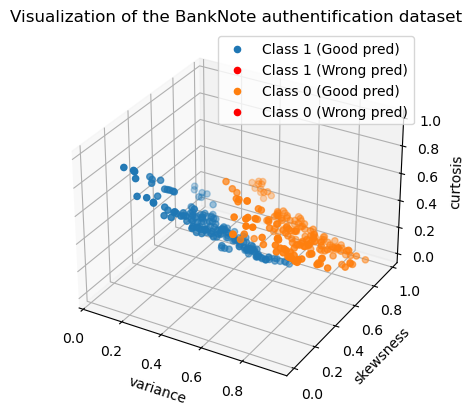

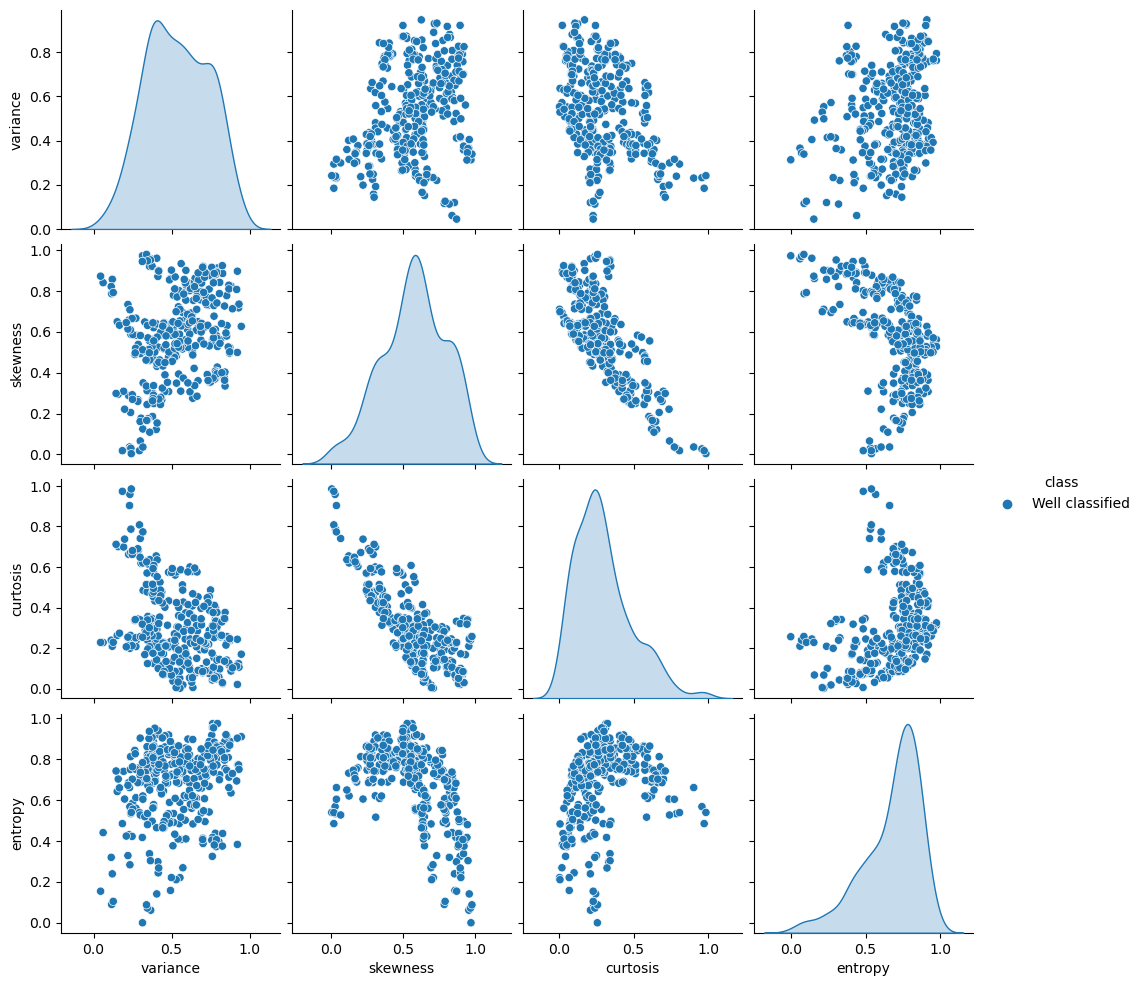

In [14]:
#ploting 3d results on Bank dataset

import main
main.display_results(df_bank_Test,Classifiers,"KNN",1)
# methods: "KNN","Random_forest","Decision_tree", "MLP", "Logistic regression"
# tests: 1,2,3 or 4 (fraction of training set)

Good programming practices were taken into account in this project.
These practices could be divided into two categories.

On the one hand, we adopted a few habits very useful for improving our efficiency while coding. Of course we can mention some basic advices like regularly adding comments to our work, or giving meaningful names to our variables. This part of the job was an absolute must for this project, as every member of the group didn't start working on it at the same time or on a same task. In a way, each of us became the "code buddy" of the other team members who worked on the project previously, allowing them to add comments to parts they had struggled understanding, or rearrange the code for it to be more readable. Gradually our code was more enjoyable working on.

On the other hand, we tried our best to make the project as clear as possible for any new user who would be interested by our work. The "README" text file aims at giving a concise explanation of the objectives of the project, and provides some information about the environnement needed for running the code. Some other details inside the code make it handier for newcomers, like the fact that all necessary modules are imported at the beginning of both this file and the "main" python script, or that the "training" function in "main.py" returns a message informing the user that the method is not recognized if the method is not recognized by/listed in the function.
We finally let our emails as an opportunity to contact us if needed.